In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def stochastic_neuron_model(num_steps, p, pf, L):
    a = 0  # Initial activity
    activity = [a]  # List to store activity over time
    state = ""
    count = 0
    count2 = 0
    
    for _ in range(num_steps):
        if a < L:  # Subthreshold regime
            if np.random.random() < p:  # Transition to higher activity state
                a += 1
                state = "subumbral"
                if a == L:
                    state = "umbral"
        elif a == L and state == "umbral":  # Threshold reached
            if np.random.random() < pf:  # Spike generation
                a += 3 * L
                state = "reposo"
                count += 1
                count2 += 1
            else:  # No spike, decrease activity to initial state
                a -= L
                state = "reposo"
                count += 1
        elif a > 0:  # Activity decreasing after spike
                while a > 0:
                    a -= L / 5
                    state = "reposo"
        activity.append(a)
    print(count)
    print(count2)
    
    return activity

57
9


Text(0.5, 1.0, 'Stochastic Neuron Model - Panel A')

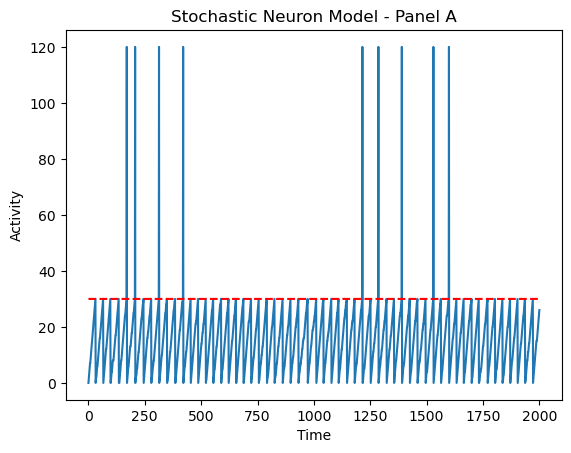

In [3]:
# Example usage for panel A
num_steps = 2000  # Number of time steps
p = 0.9  # Transit probability of internal state
pf = 0.1  # Firing probability
L = 30  # Activation threshold

activity = stochastic_neuron_model(num_steps, p, pf, L)

# Plotting the activity over time
time = list(range(num_steps + 1))
plt.plot(time, activity)
plt.plot(time, [L] * len(time), 'r--', label='L')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Stochastic Neuron Model - Panel A')

57
26


Text(0.5, 1.0, 'Stochastic Neuron Model - Panel A')

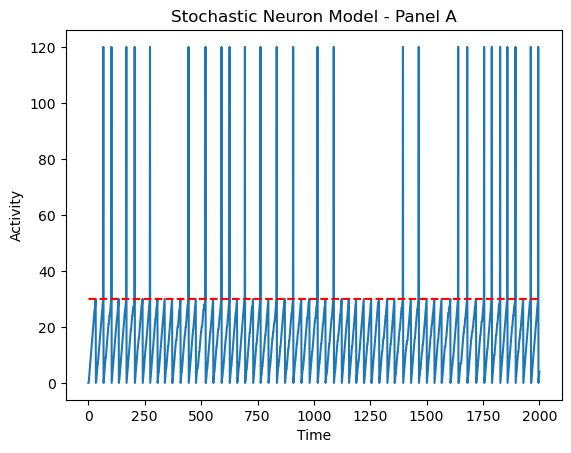

In [4]:
# Example usage for panel A
num_steps = 2000  # Number of time steps
p = 0.9  # Transit probability of internal state
pf = 0.5  # Firing probability
L = 30  # Activation threshold

activity = stochastic_neuron_model(num_steps, p, pf, L)

# Plotting the activity over time
time = list(range(num_steps + 1))
plt.plot(time, activity)
plt.plot(time, [L] * len(time), 'r--', label='L')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Stochastic Neuron Model - Panel A')

56
53


Text(0.5, 1.0, 'Stochastic Neuron Model - Panel A')

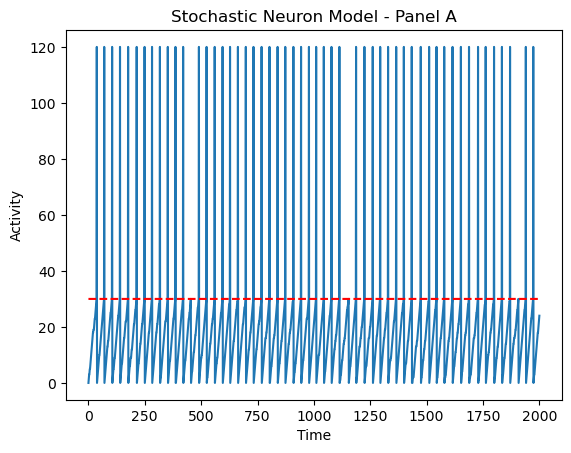

In [5]:
# Example usage for panel A
num_steps = 2000  # Number of time steps
p = 0.9  # Transit probability of internal state
pf = 0.9  # Firing probability
L = 30  # Activation threshold

activity = stochastic_neuron_model(num_steps, p, pf, L)

# Plotting the activity over time
time = list(range(num_steps + 1))
plt.plot(time, activity)
plt.plot(time, [L] * len(time), 'r--', label='L')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Stochastic Neuron Model - Panel A')

In [6]:
0.7

0.7

In [7]:
def stochastic_neuron_model_network(p, pf, L, g, num_steps, n_neurons):
    G = nx.complete_graph(n_neurons)
    a = np.zeros((n_neurons, num_steps))
    states = np.zeros(n_neurons, dtype = int)
    for _ in range(1, num_steps):
        for node in range(n_neurons):
            if a[node, _-1] < L and states[node] == 0:  # Subthreshold regime
                if np.random.random() < p:  # Transition to higher activity state
                    a[node, _] = a[node, _-1] + 1
                    states[node] = 0
                else:
                    a[node, _] = a[node, _-1]
            else:  # Threshold reached
                if np.random.random() < pf and states[node] == 0:  # Spike generation
                    a[node, _] = a[node, _-1] + (3 * L)
                    states[node] = 1
                else:  # No spike, decrease activity to initial state
                    a[node, _] = a[node, _-1] - L
                    states[node] = 1
                    if a[node, _-1] > 0 and states[node] == 1:  # Activity decreasing after
                        a[node, _] = a[node, _-1] - (L / 5)
                        if a[node, _] <= 0:
                            states[node] = 0
        for node in range(n_neurons):
            neighbors = list(G.neighbors(node))
            c = g * np.sum([a[n, _ - 1] - a[node, _ - 1] for n in neighbors])
            a[node, _] = a[node, _] + c   
    return a

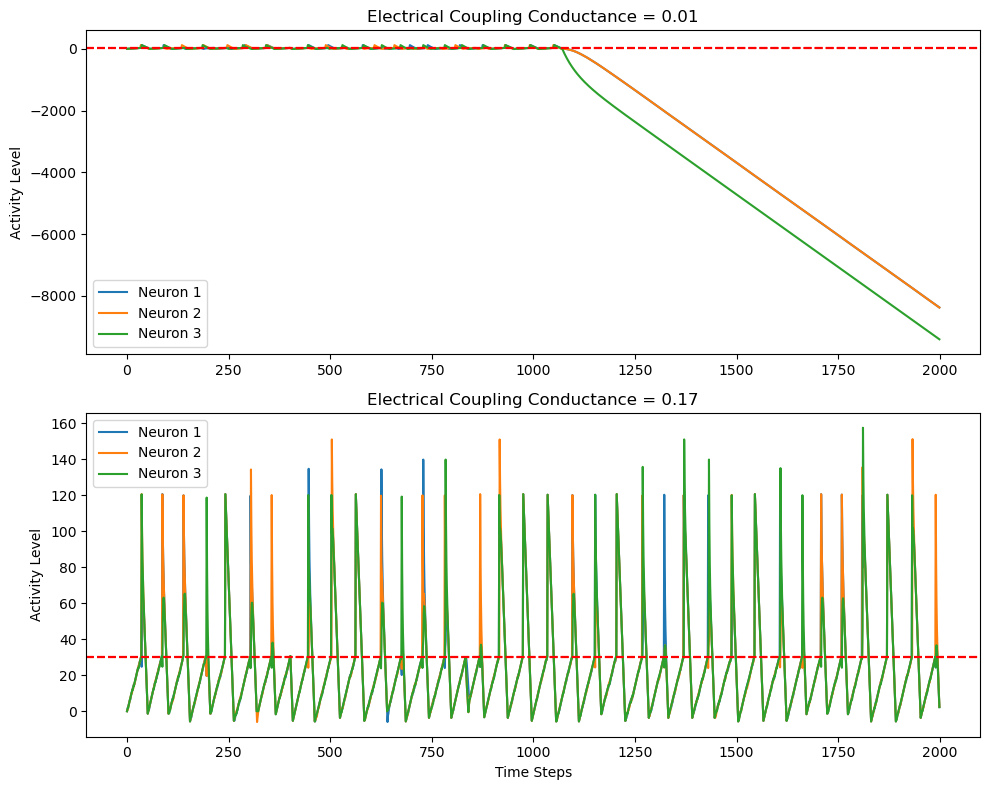

In [8]:
G = nx.complete_graph(3)
p = 0.9  # Transit probability of internal state
pf = 0.7  # Firing probability
L = 30  # Activation threshold
num_steps = 2000
g = [0.01, 0.17]
fig, axes = plt.subplots(len(g), 1, figsize=(10, 8))
for i, _ in enumerate(g):
    a = stochastic_neuron_model_network(p, pf, L, _, num_steps, len(G))# Electrical coupling conductance values
    for element in range(len(G)):
        axes[i].plot(a[element, :], label=f'Neuron {element+1}')
        axes[i].axhline(y=L, color='r', linestyle='--')
        axes[i].set_title(f'Electrical Coupling Conductance = {_}', fontsize=12)
        axes[i].set_ylabel('Activity Level', fontsize=10)
        axes[i].legend()
        axes[-1].set_xlabel('Time Steps', fontsize=10)
plt.tight_layout()

In [9]:
def stochastic_neuron_model_network(p, pf, L, g, num_steps, n_neurons):
    G = nx.grid_2d_graph(n_neurons, n_neurons)
    a = np.zeros((n_neurons, n_neurons, num_steps))
    states = np.zeros((n_neurons, n_neurons), dtype=int)

    for _ in range(1, num_steps):
        for x in range(n_neurons):
            for y in range(n_neurons):
                node = (x, y)
                if a[x, y, _ - 1] < L and states[x, y] == 0:  # Subthreshold regime
                    if np.random.random() < p:  # Transition to higher activity state
                        a[x, y, _] = a[x, y, _ - 1] + 1
                        states[x, y] = 0
                    else:
                        a[x, y, _] = a[x, y, _ - 1]
                else:  # Threshold reached
                    if np.random.random() < pf and states[x, y] == 0:  # Spike generation
                        a[x, y, _] = a[x, y, _ - 1] + (3 * L)
                        states[x, y] = 1
                    else:  # No spike, decrease activity to initial state
                        a[x, y, _] = a[x, y, _ - 1] - L
                        states[x, y] = 1
                        if a[x, y, _ - 1] > 0 and states[x, y] == 1:  # Activity decreasing after
                            a[x, y, _] = a[x, y, _ - 1] - (L / 5)
                            if a[x, y, _] <= 0:
                                states[x, y] = 0

        for x in range(n_neurons):
            for y in range(n_neurons):
                node = (x, y)
                neighbors = list(G.neighbors(node))
                c = g * np.sum([a[n[0], n[1], _ - 1] - a[x, y, _ - 1] for n in neighbors])
                a[x, y, _] = a[x, y, _] + c

    return a